In [5]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
original_img = np.array(Image.open('original_img.png'))
seg_1 = np.array(Image.open('seg_1.png'))
seg_2 = np.array(Image.open('seg_2.png'))

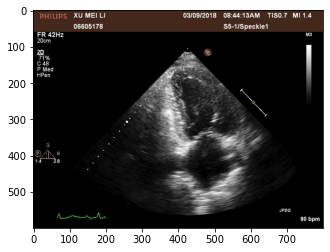

In [17]:
plt.imshow(original_img)

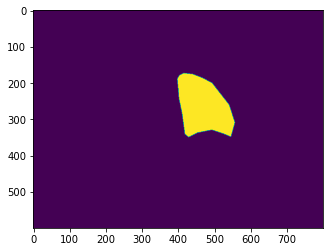

In [18]:
plt.imshow(seg_1)

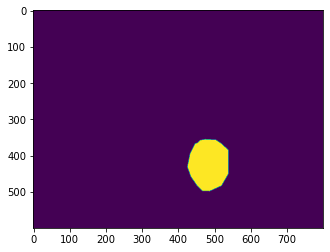

In [19]:
plt.imshow(seg_2)

In [7]:
h,w,c = 300,400,3
start_x = w//2-10-128
start_y = h//2+13-128

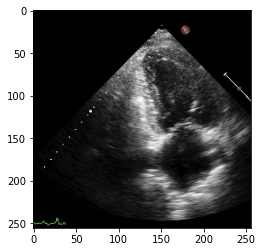

In [22]:
arr = np.zeros((256,256,6)) # 3(original_img) + 1(seg_1) + 1(seg_2) + 1(background)
resize_img = cv2.resize(original_img, (400,300),interpolation=cv2.INTER_CUBIC)/255
resize_img_256 = resize_img[start_y:start_y+256, start_x:start_x+256,:]
plt.imshow(resize_img_256)

arr[:,:,:3] = resize_img_256

In [23]:
seg_1.max()

148

In [26]:

# 因為seg的數值也要轉成0-1
seg_1_rescale = (seg_1 - seg_1.min())/(seg_1.max() - seg_1.min())
seg_2_rescale = (seg_2 - seg_2.min())/(seg_2.max() - seg_2.min()) 

In [34]:
# 處理 seg的時候才要用cv2.threshold
resize_seg_1 = cv2.resize(seg_1_rescale, (400,300),interpolation=cv2.INTER_CUBIC)
_,resize_seg_1_binary = cv2.threshold(resize_seg_1,0.5,1,cv2.THRESH_BINARY)
resize_seg_1_binary_256 = resize_seg_1_binary[start_y:start_y+256, start_x:start_x+256]

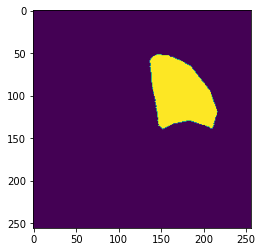

In [36]:
plt.imshow(resize_seg_1_binary_256)

In [45]:
arr[:,:,3] = resize_seg_1_binary_256

In [38]:
resize_seg_2 = cv2.resize(seg_2_rescale, (400,300),interpolation=cv2.INTER_CUBIC)
_,resize_seg_2_binary = cv2.threshold(resize_seg_2,0.5,1,cv2.THRESH_BINARY)
resize_seg_2_binary_256 = resize_seg_2_binary[start_y:start_y+256, start_x:start_x+256]

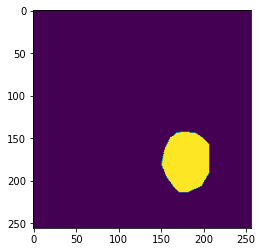

In [39]:
plt.imshow(resize_seg_2_binary_256)

In [46]:
arr[:,:,4] = resize_seg_2_binary_256

In [41]:
background = cv2.bitwise_and(1-resize_seg_1_binary_256,1-resize_seg_2_binary_256)

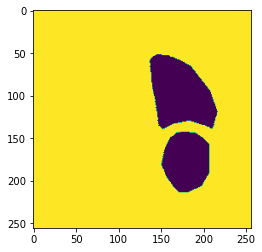

In [42]:
plt.imshow(background)

In [48]:
arr[:,:,5] = background